## Create dummy data and labels

In [1]:
import numpy as np   
import matplotlib.pyplot as plt
import random
from scipy.fft import fft, fftfreq, rfft, rfftfreq, irfft, ifft

def generate_sine_wave(frequency, time_points):
    return np.sin((2 * np.pi) * (time_points * frequency + random.random())) 

def generate_frequency_distribution(max_frequency = 512, N_freq_points = 1024):
    '''
     Returns the magnitude of frequencies, with a list of frequencies as input.
     The shape of the resulting fourier transform is inspired by the shape of Planck's law.
     1 / (x^2 * (exp(1/x)-1))
    '''
    frequencies = np.linspace(0, max_frequency, N_freq_points , endpoint=False)
    f_temp = np.where(frequencies == 0, 1e-2, frequencies) # divide by zero error if f == 0
    return frequencies, 1/(f_temp**2 * (np.exp(1/f_temp)-1))

def random_frequency_from_density_distribution(max_freq, frequency_density):  
    '''
     Returns a random frequency from a cumulative distribution: 
        1. Sum the array cumulatively and scale from 0 to 1
        2. Pick a random number between 0 and 1
        3. Loop through the array until you are >= to a random value

    Args:
     max_freq: float
        The maximum frequency that the function can return.
        
     frequency_density: 1D numpy array
        The density probability distribution
    '''

    cumulative = np.cumsum(frequency_density)
    cumulative /= cumulative[-1]      
    random_value = random.random()
    frequencies = np.linspace(0, max_freq, len(frequency_density) , endpoint=False)
    for i, cum_value in enumerate(cumulative):
        if(cum_value >= random_value):
            return frequencies[i]
    return frequencies[i]

def generate_epoch(N_frequencies = 100, duration = 2, sample_freq = 512, max_frequency = 100, frequency_density = []):
    '''
     Returns a single epoch.

    Args: TODO

    '''

    N_time_points = sample_freq * duration

    # Creates a frequency density if no such variable is passed.
    if(len(frequency_density) == 0):
        # frequency_density = np.linspace(0, 1, N_time_points, endpoint=False)
        frequency_density = np.ones(N_time_points)

    # Create epoch by summing up sines of different frequencies
    epoch = np.zeros(N_time_points)
    time_points = np.linspace(0, duration, N_time_points, endpoint=False)
    for i in range(N_frequencies):
        freq = random_frequency_from_density_distribution(max_frequency, frequency_density)
        epoch += generate_sine_wave(freq, time_points)
    
    return epoch

def show_plot(x, y, title = "", xlabel = "", ylabel = "", show = True):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if show:
        plt.plot(x, y)
        plt.show()

#### Create a Dummy signal

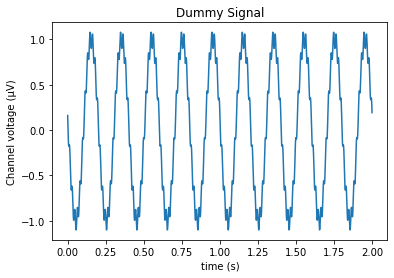

In [2]:
sample_freq = 2048  # frequency in Hertz
duration = 2        # Seconds
N_time_points = sample_freq * duration
time_points = np.linspace(0, duration, N_time_points, endpoint=False)

signal = generate_sine_wave(5, time_points)
noise = generate_sine_wave(60, time_points) * 0.1
# noise += generate_sine_wave(6000, time_points) * 0.01
# noise += generate_sine_wave(9000, time_points) 

wave = signal + noise

show_plot(time_points, wave, "Dummy Signal", "time (s)", "Channel voltage (\u03BCV)")


#### Create continuous Fourier Transform

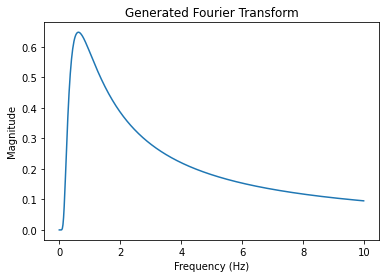

In [3]:
max_freq = 10 
N_freq_points = max_freq * 50
frequency_points = sample_freq * max_freq
    
frequencies = np.linspace(0, max_freq, max_freq * sample_freq , endpoint=False)
frequencies, frequency_density = generate_frequency_distribution(max_freq, N_freq_points)

plt.title("Generated Fourier Transform")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.plot(frequencies, frequency_density)
plt.show()


Inverse Fourier transform (Not Working Correctly)


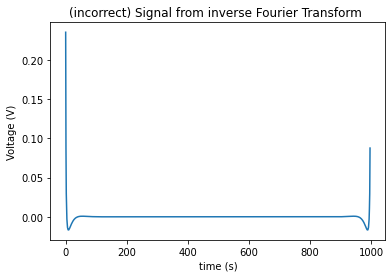

In [4]:
inverse_FT = irfft(frequency_density)

plt.title("(incorrect) Signal from inverse Fourier Transform ")
plt.xlabel("time (s)")
plt.ylabel("Voltage (V)")
plt.plot(inverse_FT)
plt.show()

#### Get a Frequency Probability Distribution from the Fourier Transform

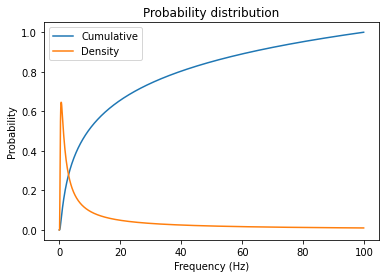

In [5]:
max_freq = 100
sample_freq = 500
N_time_points = sample_freq * duration
time_points = np.linspace(0, duration, N_time_points, endpoint=False)

frequencies, frequency_density = generate_frequency_distribution(max_freq)

cumulative = np.cumsum(frequency_density)
cumulative /= cumulative[-1]

show_plot(None, None, "Probability distribution", "Frequency (Hz)", "Probability", show = False)
plt.plot(frequencies, cumulative, label = "Cumulative")
plt.plot(frequencies, frequency_density/cumulative[-1], label = "Density")
plt.legend()
plt.show()
    

#### Get random frequencies from density distribution 

In [6]:
print("Random Frequencies from Distribution:")
for i in range(5):
    print(f'{random_frequency_from_density_distribution(max_freq, frequency_density):.3f}')


Random Frequencies from Distribution:
64.160
4.102
68.848
8.105
2.246


#### Create signals from random frequencies

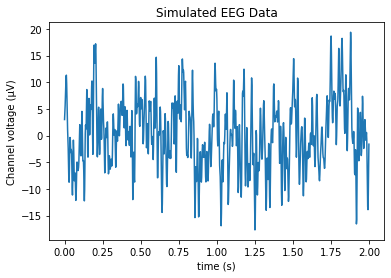

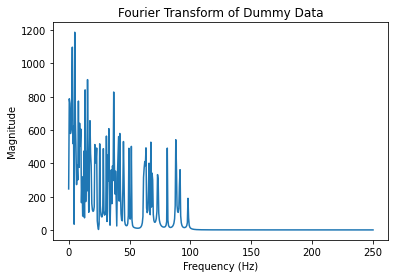

In [7]:
epoch = generate_epoch(100, duration, sample_freq, max_freq, frequency_density)
show_plot(time_points, epoch, "Simulated EEG Data", "time (s)", "Channel voltage (\u03BCV)")

#### Fourier Transform of Dummy Signal
epoch_FT = rfft(epoch)
freq = rfftfreq(duration * sample_freq, 1 / sample_freq)

show_plot(freq, np.abs(epoch_FT), "Fourier Transform of Dummy Data", "Frequency (Hz)", "Magnitude")


#### Generating Data
+ Put signals into array with dimensions (subjects, trials, channels) with different signals between subjects


In [8]:
N_subjects_1 = 10
N_subjects_2 = 10

N_channels = 32

N_epochs = 1000



# for i in range(N_channels):
#     for i in range(N_epochs):

    

#### TODO

+ Add labels to subjects
+ Save data to file
+ Train on data